# Importing libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [193]:
data_1 = pd.read_csv('/Users/Usuario/demo/Ironhack/tech_challenge/technical_challenge_DA/data/measurements.csv')
data_1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [194]:
data_2 = pd.read_excel('/Users/Usuario/demo/Ironhack/tech_challenge/technical_challenge_DA/data/measurements2.xlsx')
data_2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


# Concatenating dataframes

In [195]:
#concatenating both dataframes, because they have the same columns
complete_data = pd.concat([data_1, data_2], ignore_index=True)

In [196]:
complete_data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


# Exploring null values

In [197]:
complete_data.shape

(776, 12)

In [198]:
complete_data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       24
temp_outside       0
specials         590
gas_type           0
AC                 0
rain               0
sun                0
refill liters    750
refill gas       750
dtype: int64

In [199]:
#The columns refill liters and refill gas are almost completely null in every record, we should drop them. 
#We might need to drop the specials column too but I want to explore it first

In [200]:
dataset = complete_data.drop(columns=['refill liters', 'refill gas'], axis=1)

In [201]:
#exploring the specials column
dataset['specials'].value_counts()

rain                  64
sun                   54
AC rain               18
ac                    16
AC                    12
snow                   6
sun ac                 6
AC snow                2
half rain half sun     2
AC sun                 2
AC Sun                 2
ac rain                2
Name: specials, dtype: int64

In [202]:
#76% of the column is missing, so we need to drop it too
dataset['specials'].isna().sum()/dataset['specials'].shape[0]

0.7603092783505154

In [203]:
dataset.drop('specials', axis=1, inplace=True)

# Exploring data types 

In [204]:
dataset.describe()

,speed,temp_outside,AC,rain,sun
count,776.000000,776.000000,776.00000,776.000000,776.000000
mean,41.927835,11.358247,0.07732,0.123711,0.082474
std,13.589747,6.987030,0.26727,0.329464,0.275263
min,14.000000,-5.000000,0.00000,0.000000,0.000000
25%,32.750000,7.000000,0.00000,0.000000,0.000000
50%,40.500000,10.000000,0.00000,0.000000,0.000000
75%,50.000000,16.000000,0.00000,0.000000,0.000000
max,90.000000,31.000000,1.00000,1.000000,1.000000


In [205]:
dataset.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

In [206]:
dataset.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [207]:
#the columns distance, consume and temp_inside should be numerical, so we need to convert them
#there are some commas instead of dots, so we need to replace them in those values that have them, so that they can be
#considered as floats

In [208]:
dataset['distance']

0        28
1        12
2      11,2
3      12,9
4      18,5
       ... 
771    16.0
772    16.1
773    16.0
774    15.4
775    14.7
Name: distance, Length: 776, dtype: object

In [209]:
def convert_cols_to_float(df, cols):
    for col in cols:
        # check which values have commas
        mask = df[col].str.contains(',', na=False)

        # convert only the values with commas to float
        df.loc[mask, col] = pd.to_numeric(df.loc[mask, col].str.replace(',', '.'), errors='coerce')

        # convert the remaining values to float
        df.loc[~mask, col] = pd.to_numeric(df.loc[~mask, col], errors='coerce')
        
    return df[cols]


In [210]:
converted_cols = convert_cols_to_float(dataset, ['temp_inside', 'distance', 'consume'])

In [211]:
converted_cols

,temp_inside,distance,consume
0,21.5,28.0,5.0
1,21.5,12.0,4.2
2,21.5,11.2,5.5
3,21.5,12.9,3.9
4,21.5,18.5,4.5
...,...,...,...
771,24.5,16.0,3.7
772,25.0,16.1,4.3
773,25.0,16.0,3.8
774,25.0,15.4,4.6


In [212]:
#Now I will concat the two new dataframes

In [213]:
new_dataset = pd.concat([dataset.drop(columns=['temp_inside', 'distance', 'consume'], axis=1), pd.DataFrame(converted_cols)], axis=1)

In [214]:
new_dataset.isna().sum()

speed            0
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
temp_inside     24
distance         0
consume          0
dtype: int64

In [215]:
new_dataset['distance'] = new_dataset['distance'].astype(float)
new_dataset['consume'] = new_dataset['consume'].astype(float)
new_dataset['temp_inside'] = new_dataset['temp_inside'].astype(float)

In [216]:
#Now I need to explore the gas type column

In [217]:
#These are two different types of petrol
#I will keep this column as it is, it might be interesting as a target for a predictive model
new_dataset['gas_type'].value_counts()

SP98    456
E10     320
Name: gas_type, dtype: int64

In [218]:
#The columns AC, rain and sun, are actually categorical (0 and 1, they represent binary variables) where typically 0 means no and 1 yes

In [219]:
#finally let's replace the null values in temp_inside with the mean

In [220]:
mean_value = new_dataset['temp_inside'].mean()
mean_value

21.929521276595743

In [221]:
new_dataset['temp_inside'] = new_dataset['temp_inside'].fillna(mean_value)

# Initial EDA

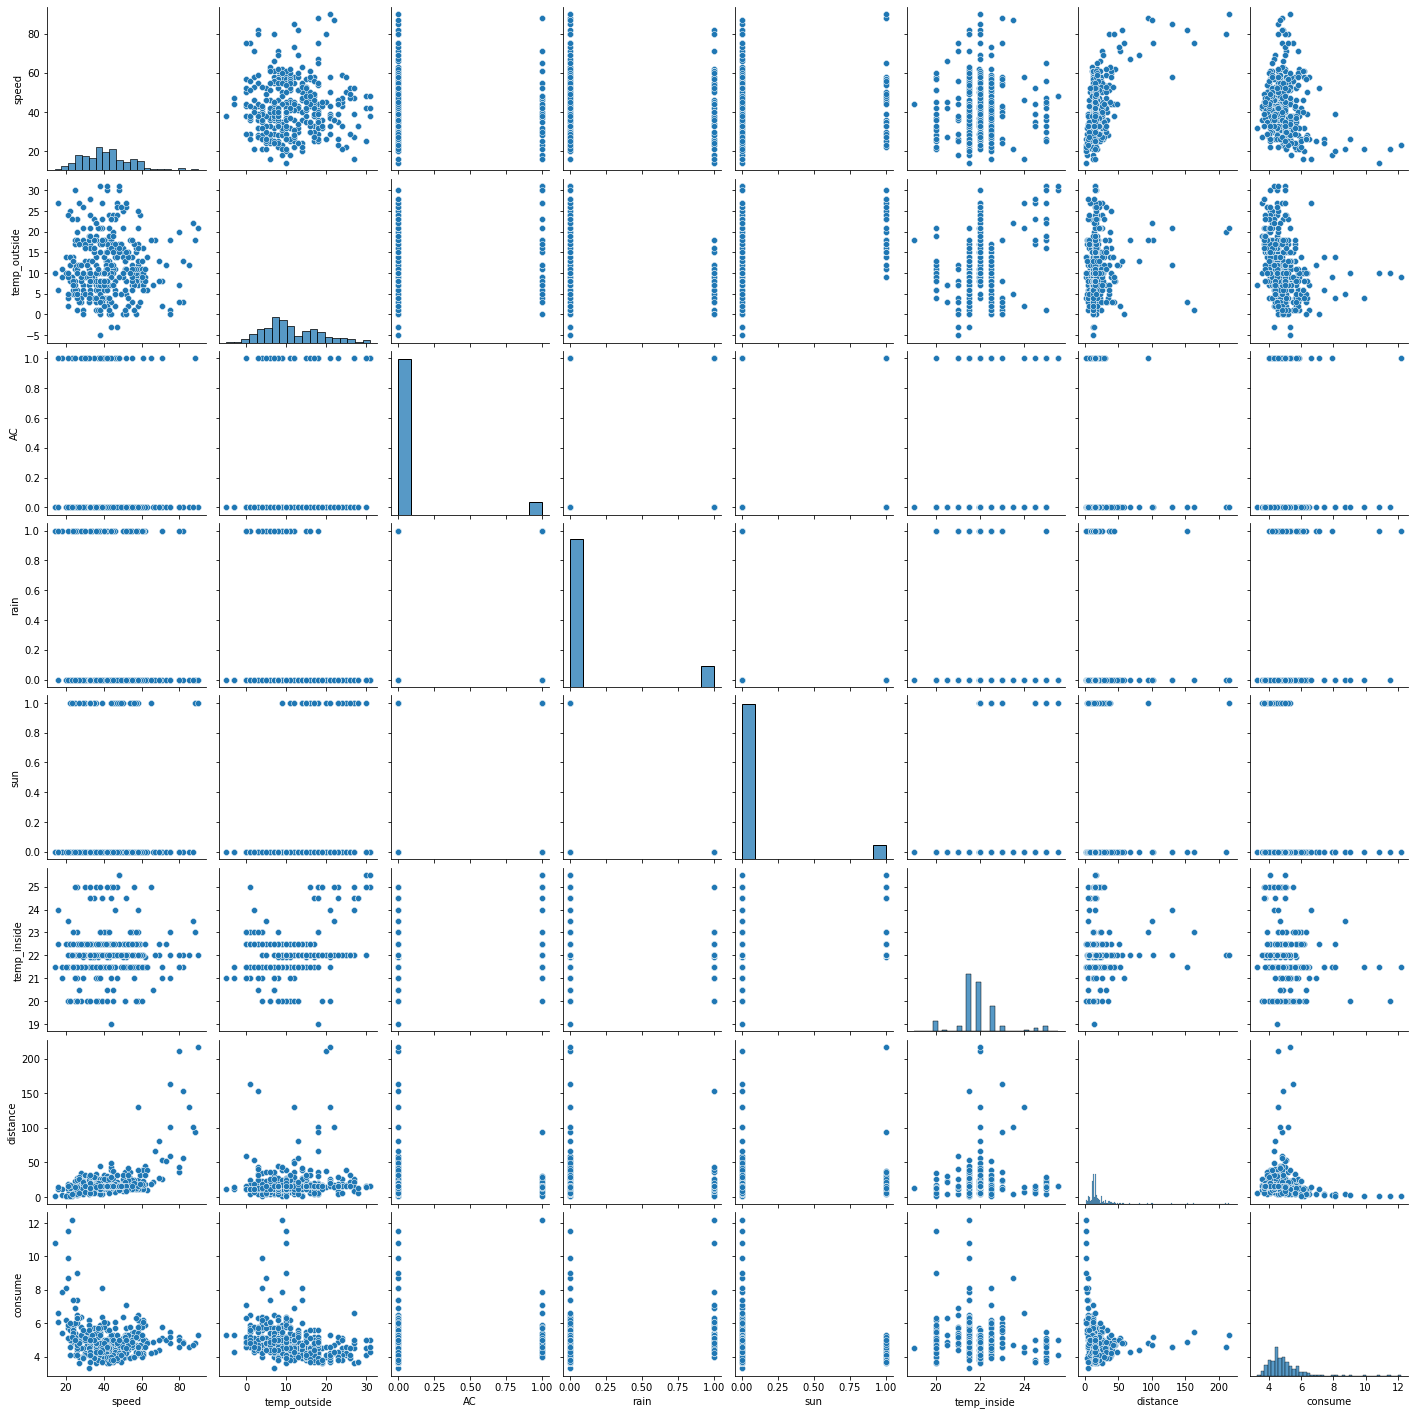

In [225]:
#There seem to be interesting relations between distance and consume (negative), distance and speed (positive), speed and consume (negative)
sns.pairplot(new_dataset)

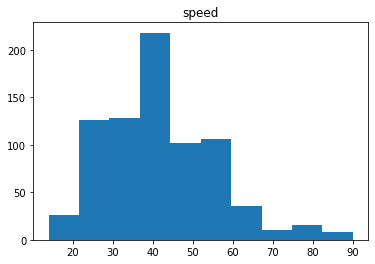

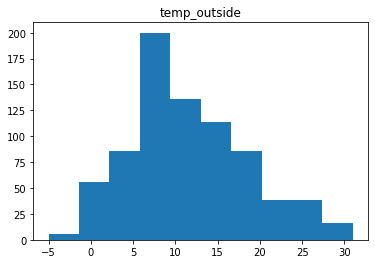

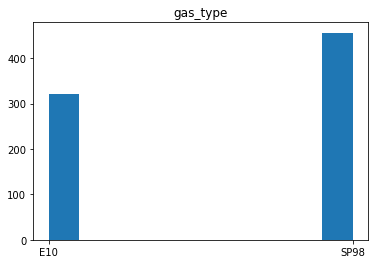

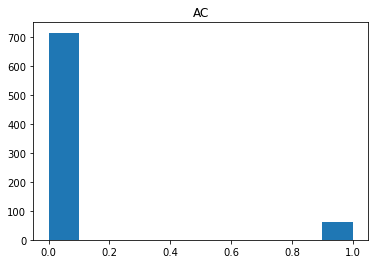

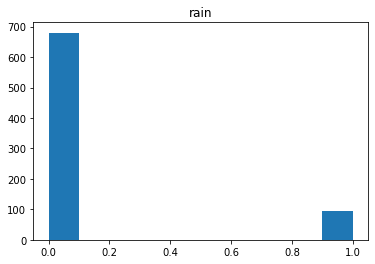

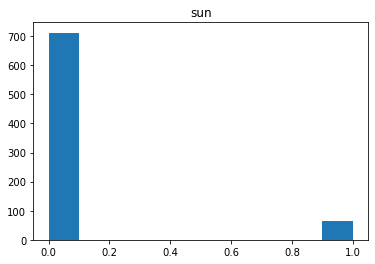

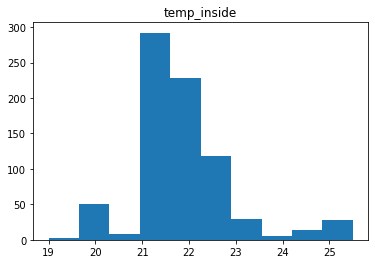

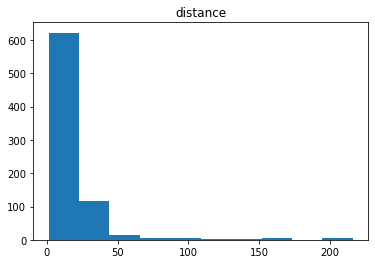

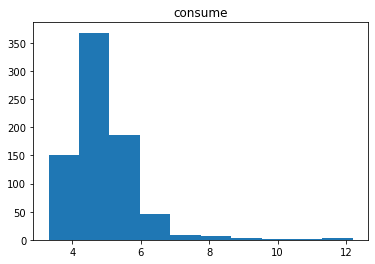

In [226]:
#Interesting: distance and consume are positively skewed, which means there are some outliers (their tail is on the right)
#temp outside is the one that shows the most normal distribution
for column in new_dataset.columns:
    plt.hist(new_dataset[column], bins=10)
    plt.title(column)
    plt.show()

<AxesSubplot:>

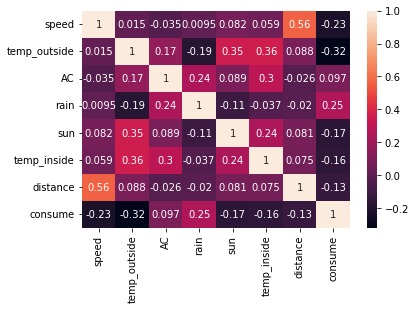

In [227]:
#Just like we saw earlier, distance and speed are positively correlated (0,56) whilst the negative correlation
#between distance and consume, and speed vs distance, are not as meaningful as I thought.
#On the other hand, it seems that speed and the temperature outside are negatively correlated
#with consumption
sns.heatmap(new_dataset.corr(), annot=True)

# Checking outliers

In [228]:
Q1 = new_dataset.quantile(0.25)
Q3 = new_dataset.quantile(0.75)
IQR = Q3 - Q1

In [229]:
outliers = ((new_dataset < (Q1 - 1.5 * IQR)) | (new_dataset > (Q3 + 1.5 * IQR))).any(axis=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2764\2828392407.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((new_dataset < (Q1 - 1.5 * IQR)) | (new_dataset > (Q3 + 1.5 * IQR))).any(axis=1)


In [230]:
outliers.value_counts()

False    484
True     292
dtype: int64

In [231]:
#After considering what we saw in the histograms, I think we need to keep the outliers, as they represent genuine data points
#and the analysis might change if we delete them. They're also quite significant, so we could lose a lot of data 

# Saving clean data

In [232]:
import pickle

with open('clean_data.pkl', 'wb') as f:
    pickle.dump(new_dataset, f)